# Function to Predict Model

In [1]:
import joblib
import numpy as np
from keras.models import load_model

def predict_stock_price(open_price, low_price, high_price, volume):

    # Load the scaler
    scaler = joblib.load('scaler_v1.save')

    # Load the model
    model = load_model('TataMotors_Stock_Price_Prediction_Model_LSTM_v1.h5')

    # Prepare input data
    user_input = [[open_price, low_price, high_price, volume]]
    user_input_scaled = scaler.transform(user_input)
    user_input_scaled = np.array(user_input_scaled).reshape(1, 1, 4)

    # Predict the close price
    pred_close = model.predict(user_input_scaled, verbose=0)

    # Output the prediction
    # print("\n\nPredicted Close Value:", pred_close[0][0][0])

    return pred_close[0][0][0]


# Single Value Check

In [2]:
# Example input features
Open = 1072.00
Low = 1070.00
High = 1099.95
Volume = 11440000


price = predict_stock_price(Open, Low, High, Volume)
print("\n\n Predicted Close Value: ", price)

/Users/arpanpatel/Documents/Arpan/AI_Projects/Tata_Motors_Stock_Predictions/Stock_Price_Prediction_Env/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
2024-08-18 19:26:24.565604: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz




 Predicted Close Value:  1087.6254


# Evaluate Model with Test Dataset

In [1]:
import pandas as pd
import numpy as np
import joblib
from tensorflow.keras.models import load_model
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Load data
test_df = pd.read_csv('../DataSets/TATAMOTORS_18_JUN_2024_18_AUG_2024.csv') 
# data = pd.read_csv('../DataSets/TATAMOTORS_18_Aug_2019_18_JUN_2024.csv')
# data = pd.read_csv('../DataSets/TATAMOTORS_2000_2021.csv')


# Load the scaler and model
scaler = joblib.load('scaler_v1.save')
model = load_model('TataMotors_Stock_Price_Prediction_Model_LSTM_v1.h5')

# Select features and scale
features = ['Open', 'Low', 'High', 'Volume']
X_test = test_df[features]
X_test_scaled = scaler.transform(X_test)
X_test_scaled = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])

# Predict
predictions = model.predict(X_test_scaled)
predictions = predictions.flatten()

# Actual close prices
y_test = test_df['Close'].values

# Evaluation metrics
mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions))

print(f"\n\nMean Absolute Error (MAE): {mae}")
print(f"\nRoot Mean Squared Error (RMSE): {rmse}")



2024-08-18 23:53:24.842973: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


2/2 [==============================] - 1s 158ms/step


Mean Absolute Error (MAE): 10.62515989592634

Root Mean Squared Error (RMSE): 14.412242589440133


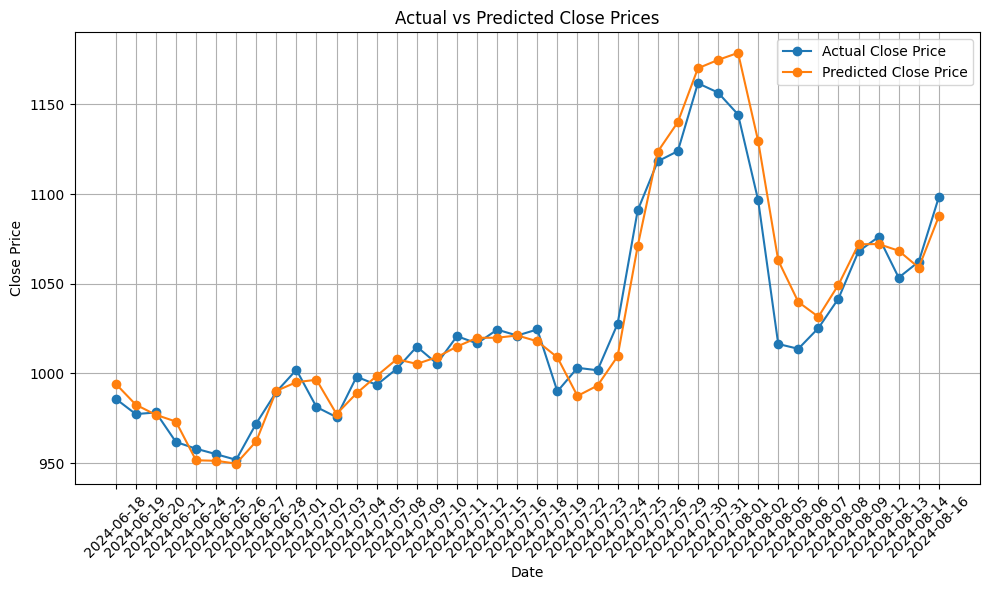

In [2]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(test_df['Date'], y_test, label='Actual Close Price', marker='o')
plt.plot(test_df['Date'], predictions, label='Predicted Close Price', marker='o')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Actual vs Predicted Close Prices')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()